# Data Analysis of Airbnb in Dublin

## Assignment
A new city manager for Airbnb has started in Dublin and wants to better understand:

<li>what guests are searching for in Dublin,</li>
<li>which inquiries hosts tend to accept.</li>

Based on the findings the new city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this challenge is to analyze, understand, visualize, and communicate the demand / supply in the market. For example you may want to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:

<li>what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,</li>
<li>what other data would be useful to have to deepen the analysis and understanding.</li>

## Data Exploration

### Import Data

In [605]:
## Import Data
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

contacts = pd.read_csv('contacts.tsv', sep="\t")

searches = pd.read_csv('searches.tsv', sep="\t")

In [606]:
contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


In [607]:
searches.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


### Data type

In [608]:
# Contacts
contacts.dtypes

id_guest          object
id_host           object
id_listing        object
ts_contact_at     object
ts_reply_at       object
ts_accepted_at    object
ts_booking_at     object
ds_checkin        object
ds_checkout       object
n_guests           int64
n_messages         int64
dtype: object

In [609]:
# Searches
searches.dtypes

ds                       object
id_user                  object
ds_checkin               object
ds_checkout              object
n_searches                int64
n_nights                float64
n_guests_min              int64
n_guests_max              int64
origin_country           object
filter_price_min        float64
filter_price_max        float64
filter_room_types        object
filter_neighborhoods     object
dtype: object

In those two dataset, the data type of columns ts_contact_at, ts_reply_at, ts_accepted_at, ts_booking_at, ds, ds_checkin and ds_checkout are string, those columns should be changed to datatime data type. 

In [610]:
# change data type from string to datetime
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

In [611]:
contacts.dtypes

id_guest                  object
id_host                   object
id_listing                object
ts_contact_at     datetime64[ns]
ts_reply_at       datetime64[ns]
ts_accepted_at    datetime64[ns]
ts_booking_at     datetime64[ns]
ds_checkin        datetime64[ns]
ds_checkout       datetime64[ns]
n_guests                   int64
n_messages                 int64
dtype: object

In [612]:
searches.dtypes

ds                      datetime64[ns]
id_user                         object
ds_checkin              datetime64[ns]
ds_checkout             datetime64[ns]
n_searches                       int64
n_nights                       float64
n_guests_min                     int64
n_guests_max                     int64
origin_country                  object
filter_price_min               float64
filter_price_max               float64
filter_room_types               object
filter_neighborhoods            object
dtype: object

### Missing Value

In [613]:
# Contacts
contacts.isna().sum()/len(contacts)

id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64

In [614]:
# Searches
searches.isna().sum()/len(searches)

ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64

Most data in the feature filter_neighborhoods are missing values, so it does not contain much useful information, and it would not contribute significantly to the analysis, then removing this column for remaining analysis.

## Analysis on Searchs Dataset

In [615]:
searches = searches.drop('filter_neighborhoods', axis=1)

In [616]:
searches.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,..."
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaT,NaT,1,NaN,1,1,GB,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt"
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaT,NaT,1,NaN,1,1,IE,NaN,NaN,NaN


In [617]:
# How long before the check in time to search the room
searches['search_before_checkin'] = searches['ds_checkin'] - searches['ds']
searches['search_before_checkin'] = searches['search_before_checkin'].dt.days
searches = searches[searches['search_before_checkin'] >= 0]

In [618]:
# Description of data
searches.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,search_before_checkin
count,23868.00000,23868.000000,23868.000000,23868.000000,11522.000000,1.152200e+04,23868.000000
mean,11.22880,7.650117,2.039048,2.443104,5.970231,8.359214e+07,51.385453
std,19.28542,21.384523,1.620324,1.913184,42.911209,2.877077e+08,65.799216
min,1.00000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,0.000000
25%,2.00000,2.000000,1.000000,1.000000,0.000000,8.800000e+01,10.000000
50%,6.00000,3.000000,2.000000,2.000000,0.000000,1.430000e+02,26.000000
75%,13.00000,5.000000,2.000000,3.000000,0.000000,3.030000e+02,67.000000
max,431.00000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604.000000


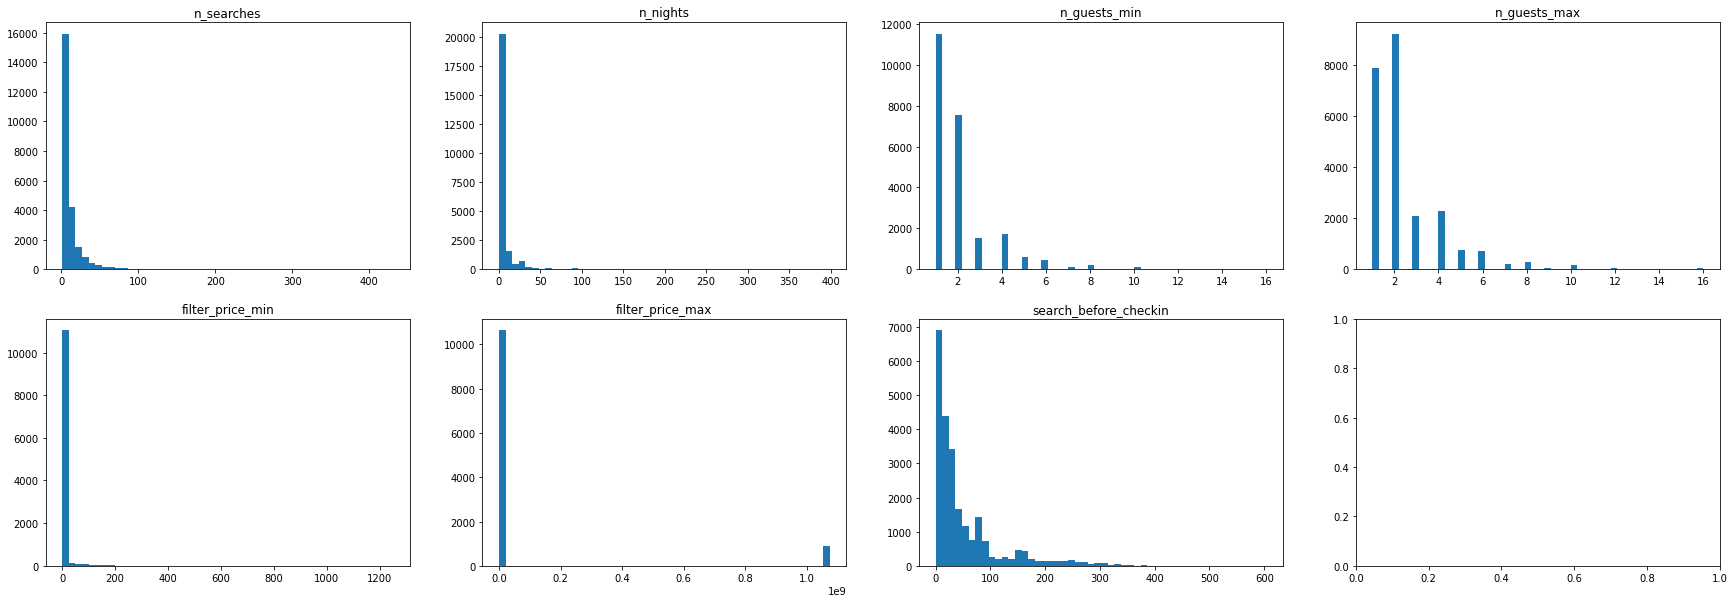

In [619]:
# Distribution of numeric feature
fig, axis = plt.subplots(2, 4)

i = 0
for row in axis:
    for col in row:
        if i >= 7:
            break
        feature_name = searches.select_dtypes('number').columns[i]
        col.hist(searches[feature_name], bins=50)
        col.set_title(feature_name)
        i += 1

fig.set_size_inches(30, 10)
plt.show()

The distributes of most numeric feature are skewed right, and from data description, some columns have many extremely large values which affect results. Therefore, it's necessary to remove extreme outliers.

In [620]:
# Remove outlier
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[df <= Q3 + 1.5*IQR]
    return df

searches_rem_outlier = searches.select_dtypes('number').apply(remove_outlier)

In [621]:
# Data description after removing outliers
searches_rem_outlier.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,search_before_checkin
count,21972.000000,21012.000000,20547.000000,22954.000000,10939.0,9979.000000,21518.000000
mean,7.144775,3.247382,1.514333,2.169208,0.0,166.420082,33.210661
std,6.633011,1.892651,0.630997,1.263257,0.0,122.267514,32.625135
min,1.000000,0.000000,1.000000,1.000000,0.0,9.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,0.0,81.000000,9.000000
50%,5.000000,3.000000,1.000000,2.000000,0.0,126.000000,23.000000
75%,10.000000,4.000000,2.000000,3.000000,0.0,206.000000,47.000000
max,29.000000,9.000000,3.000000,6.000000,0.0,625.000000,152.000000


The table above indicates that the guests usually search the Airbnb for 2 to 4 nights, and the 75% searchings are for 1 to 2 guests. Most searchings filtered the price less than $200, and guests usually search for Airbnb 47 days before checkin. 

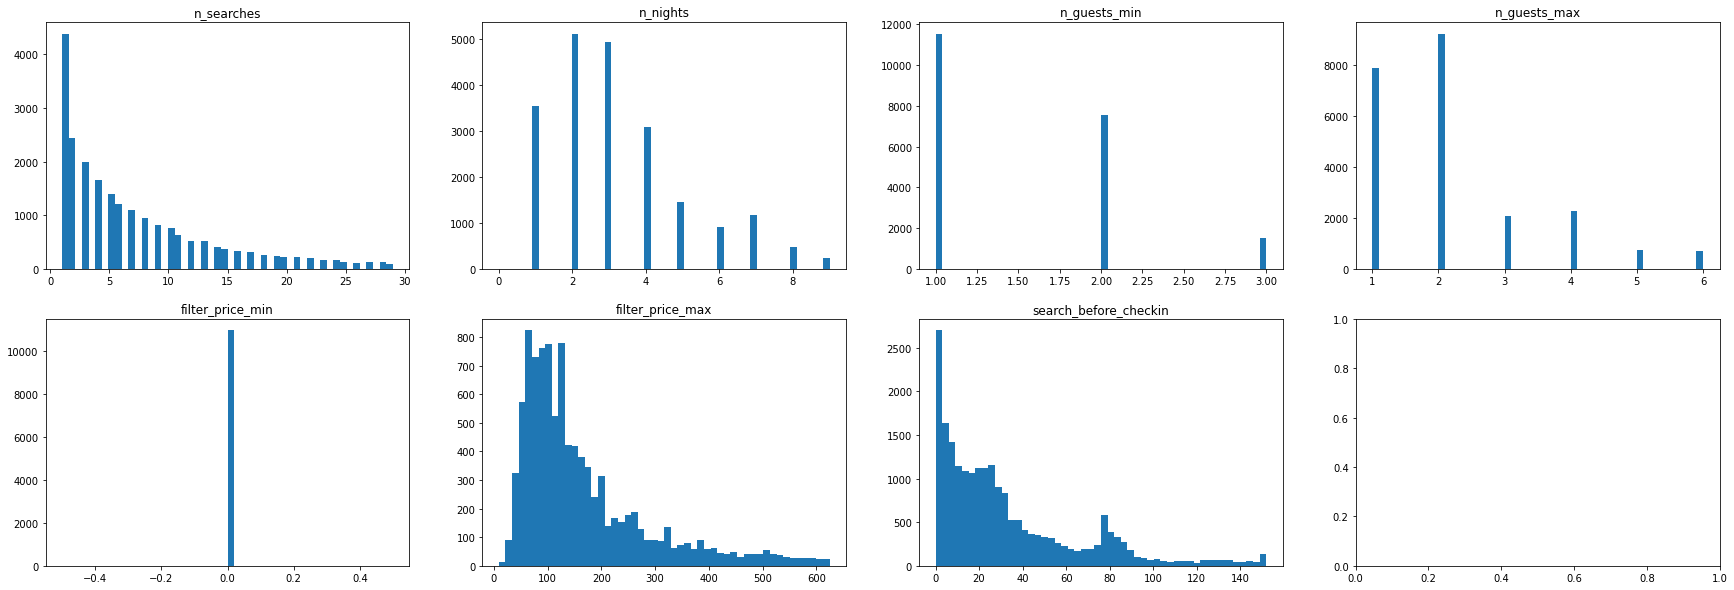

In [622]:
# Distribution after removing outliers
fig, axis = plt.subplots(2, 4)

i = 0
for row in axis:
    for col in row:
        if i >= 7:
            break
        feature_name = searches_rem_outlier.columns[i]
        col.hist(searches_rem_outlier[feature_name], bins=50)
        col.set_title(feature_name)
        i += 1

fig.set_size_inches(30, 10)
plt.show()

After removing outliers, the distributions are more reasonable, expecially for filer_price_max and search_before_chekin. 

In [623]:
# Checkin Time
searches['Checkin_Month'] = searches['ds_checkin'].dt.month
check_month = searches[searches['ds_checkin'].notna()].groupby('Checkin_Month')['ds_checkin'].count().to_frame('n_checkin').reset_index()
check_month

,Checkin_Month,n_checkin
0,1,829
1,2,520
2,3,986
3,4,381
4,5,369
5,6,341
6,7,215
7,8,164
8,9,78
9,10,10741


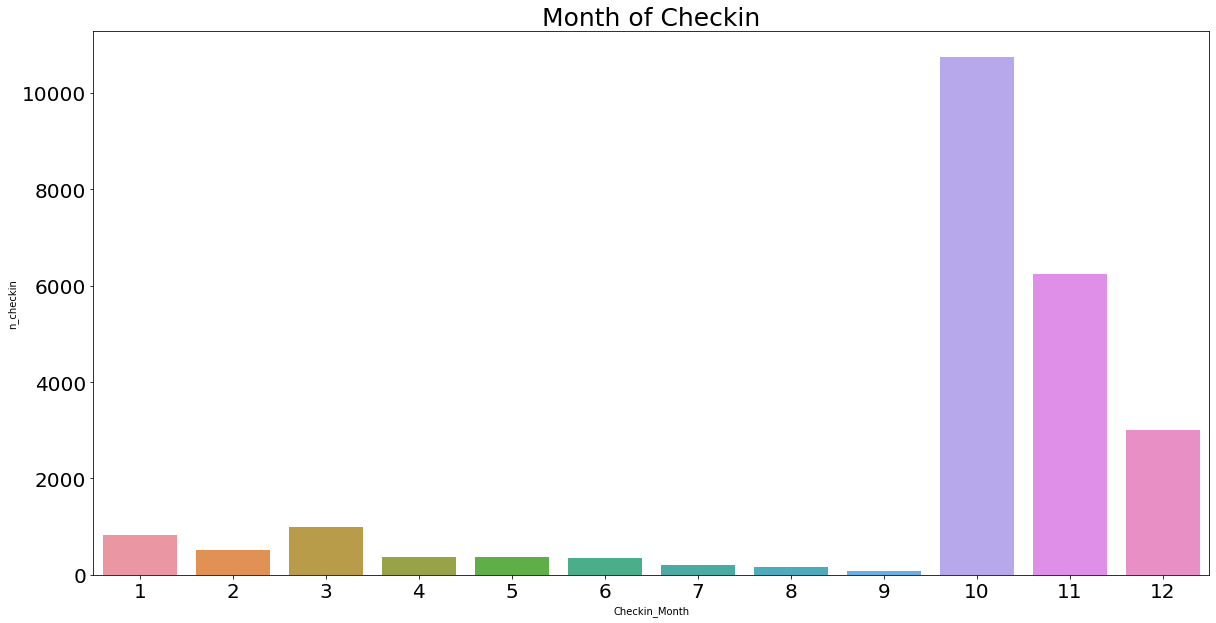

In [624]:
# The bar plot of checkin month
plt.figure(figsize=(20,10))
sns.barplot(data=check_month, x='Checkin_Month',y='n_checkin')
plt.title('Month of Checkin', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The chart indicates that most guest checkin the Airbnb rooms in Oct, Nov and Dec, especially for Oct.

In [625]:
# Mean of search_before_checkin for each month
prepare_month = searches.groupby('Checkin_Month')['search_before_checkin'].mean().to_frame('mean_prepare_time').reset_index()
prepare_month

,Checkin_Month,mean_prepare_time
0,1,96.022919
1,2,128.948077
2,3,158.477688
3,4,188.028871
4,5,219.219512
5,6,249.052786
6,7,276.762791
7,8,307.579268
8,9,339.628205
9,10,10.816684


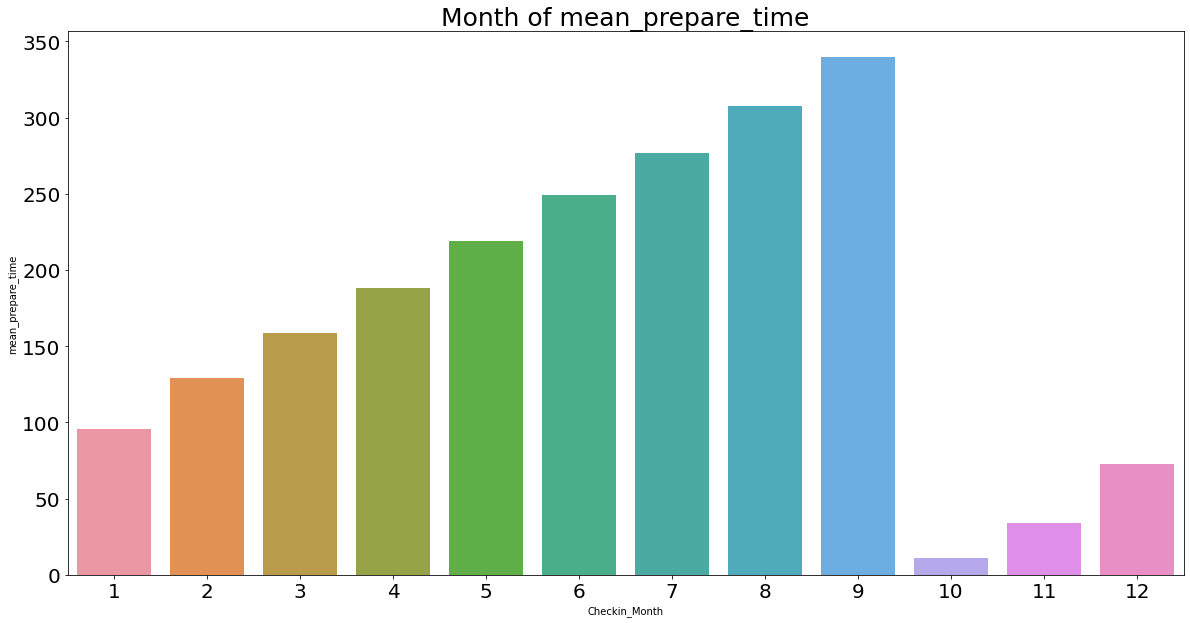

In [626]:
# The bar plot of prepare time
plt.figure(figsize=(20,10))
sns.barplot(data=prepare_month, x='Checkin_Month',y='mean_prepare_time')
plt.title('Month of mean_prepare_time', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The time between search and checkin are obviously short in Oct, Nov and Dec, which means guests during this time were not planning ahead, resulting in more urgent searches.

In [627]:
# Weekday_name of checkin
searches['Checkin_weekday_name'] = searches['ds_checkin'].dt.day_name()
weekday_name = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
checkin_day_name = searches[searches['ds_checkin'].notna()].groupby('Checkin_weekday_name')['ds'].count().to_frame('n_checkin').reindex(weekday_name).reset_index()
checkin_day_name

,Checkin_weekday_name,n_checkin
0,Monday,3178
1,Tuesday,2370
2,Wednesday,2501
3,Thursday,3318
4,Friday,5963
5,Saturday,4459
6,Sunday,2079


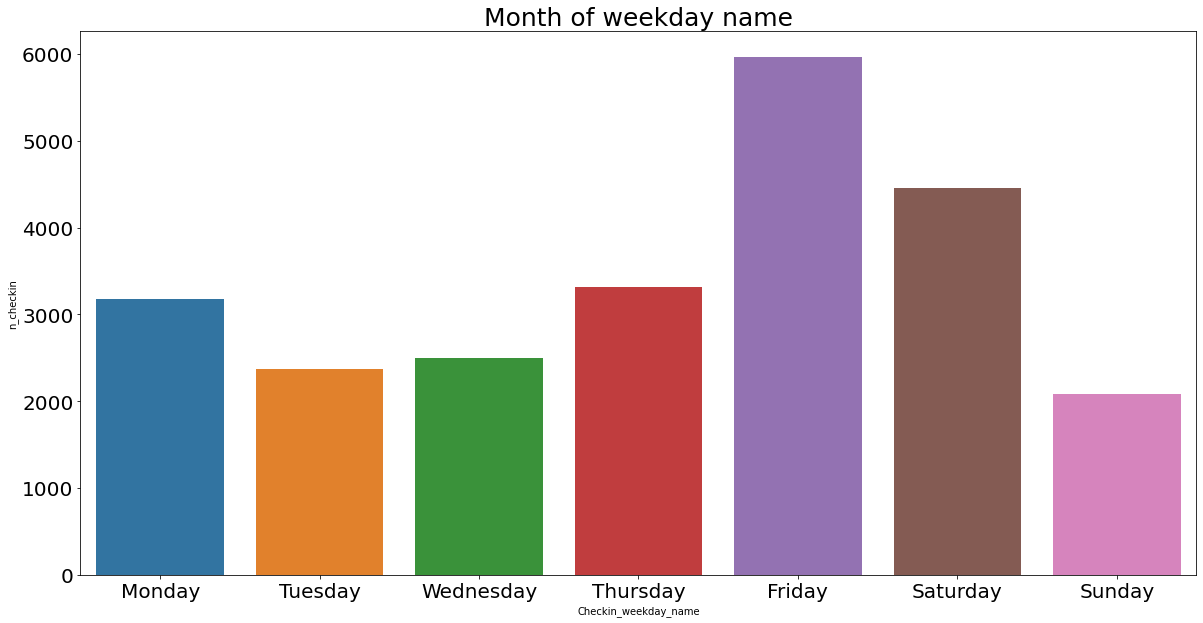

In [628]:
# The bar plot of weekday name
plt.figure(figsize=(20,10))
sns.barplot(data=checkin_day_name, x='Checkin_weekday_name',y='n_checkin')
plt.title('Month of weekday name', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Most guests checkin on Friday and Saturady.

In [629]:
# Origin_country
count_origin_country = searches[searches['ds_checkin'].notna()].groupby('origin_country')['ds'].count().to_frame('n_chechin').sort_values('n_chechin', ascending=False).reset_index()
count_origin_country.head(5)

,origin_country,n_chechin
0,US,4007
1,IE,3740
2,GB,3306
3,FR,2534
4,IT,1622


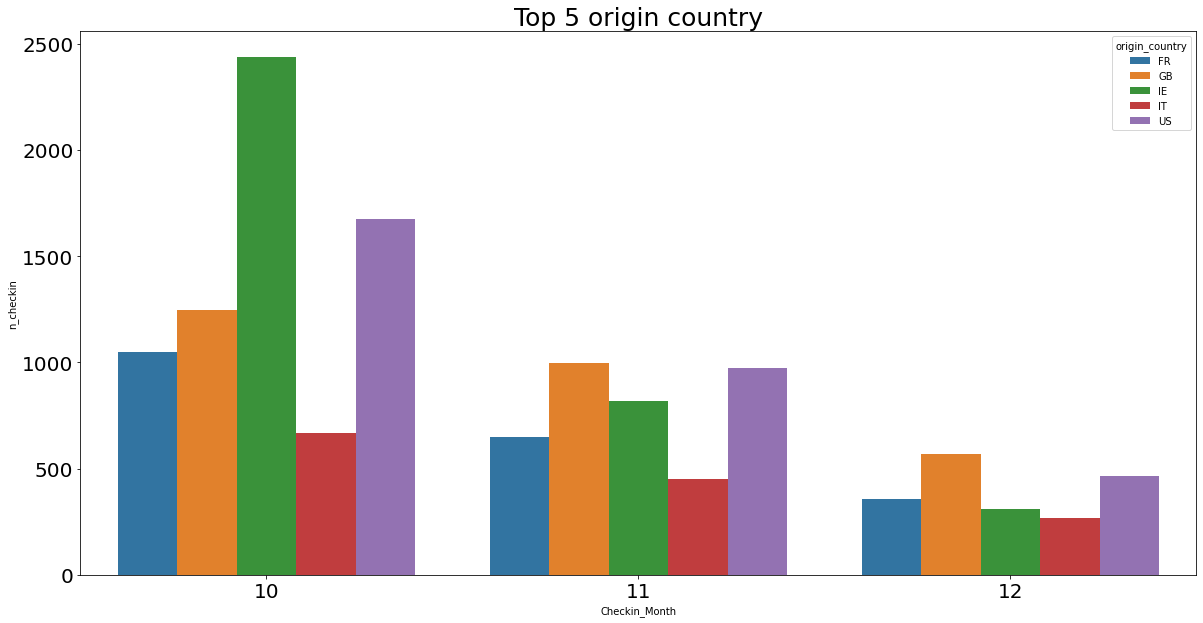

In [630]:
# The bar plot of top 5 origin country in Oct, Nov and Dec
count_origin_country_top5 = count_origin_country.head(5)
searches_top5 = searches[searches['origin_country'].isin(count_origin_country_top5['origin_country'].to_list()) & searches['Checkin_Month'].isin([10,11,12])]
searches_top5 = searches_top5.groupby(['Checkin_Month','origin_country'])['ds'].count().to_frame('n_checkin').reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x='Checkin_Month', y='n_checkin', hue='origin_country', data=searches_top5) 
plt.title('Top 5 origin country', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

From Oct to Dec, the checkin number is gradually decreased, and the searches from GB(United Kingdom), FR(France) and IT(Italy) are not changed to much, but for guests from IE(Ireland) and US(United States) in October are much more than other month.

In [631]:
# filter room types
rt = {'room_type':['Entire home/apt', 'Private room', 'Shared room'], 'n_search':[len(searches[searches['filter_room_types'].str.contains('Entire home/apt', na=False)]), 
                                                                                  len(searches[searches['filter_room_types'].str.contains('Private room', na=False)]),
                                                                                  len(searches[searches['filter_room_types'].str.contains('Shared room', na=False)])]}

room_type = pd.DataFrame(data = rt)                                               
room_type

,room_type,n_search
0,Entire home/apt,10932
1,Private room,5127
2,Shared room,782


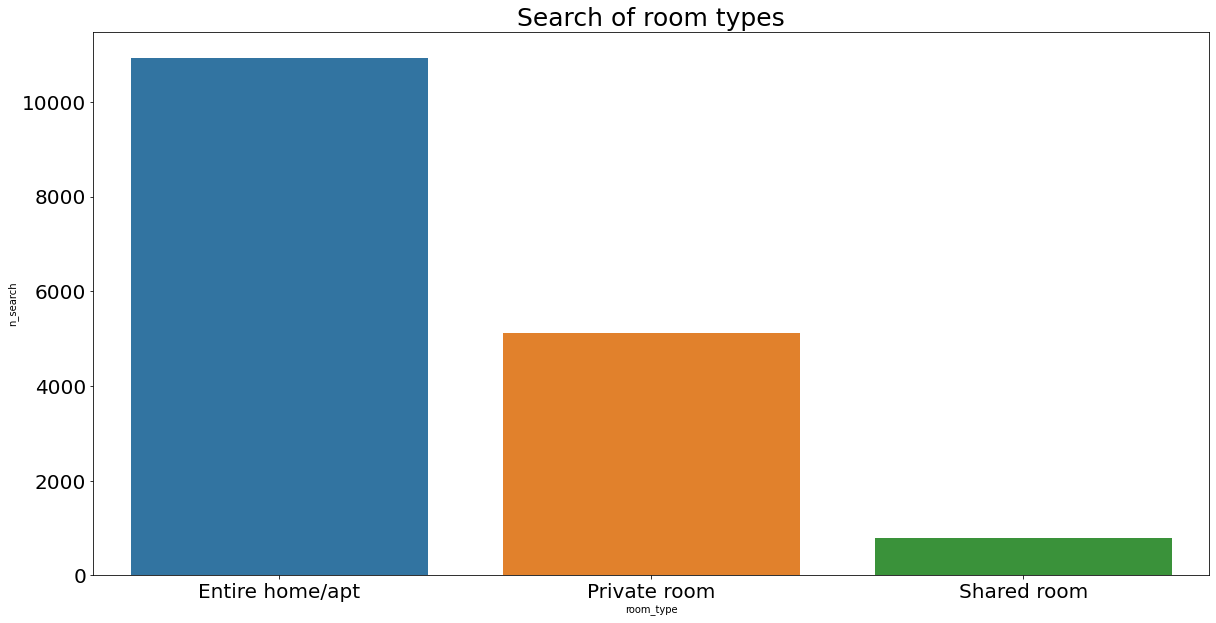

In [632]:
# Bar plot of Search of room types
plt.figure(figsize=(20,10))
sns.barplot(data=room_type, x='room_type',y='n_search')
plt.title('Search of room types', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Most searches contain Entire home/apt, followed by Private room, and Shared room is the least in the searches.

## Analysis on Contacts Dataset

In [633]:
contacts['n_night'] = (contacts['ds_checkout'] - contacts['ds_checkin']).dt.days
contacts['book_before_checkin'] = (contacts['ds_checkin'] - contacts['ts_booking_at']).dt.days
contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,n_night,book_before_checkin
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,13,2,8.0
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,10,3,22.0
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,3,2,NaN
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,2,2,NaN
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26,2014-10-10 15:24:26,2014-10-10 15:24:26,2014-10-10 15:52:42,2014-10-17,2014-10-19,2,14,2,6.0


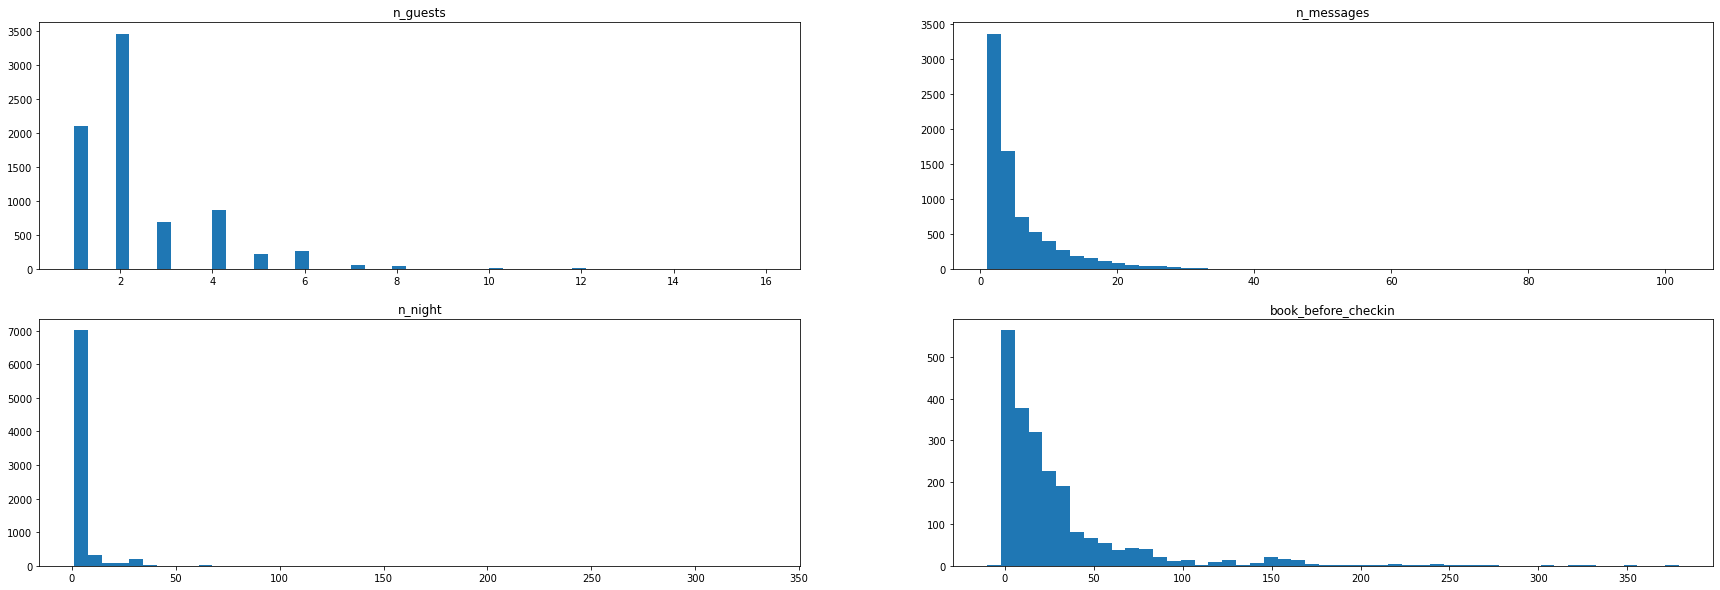

In [634]:
# Distribution of numeric feature
fig, axis = plt.subplots(2, 2)

i = 0
for row in axis:
    for col in row:
        feature_name = contacts.select_dtypes('number').columns[i]
        col.hist(contacts[feature_name], bins=50)
        col.set_title(feature_name)
        i += 1

fig.set_size_inches(30, 10)
plt.show()

The distribution of all those numeric variables are skewed right, so it's better to remove outlier to analysis the numeric variables.

In [635]:
contacts_rem_outlier = contacts.select_dtypes('number').apply(remove_outlier)

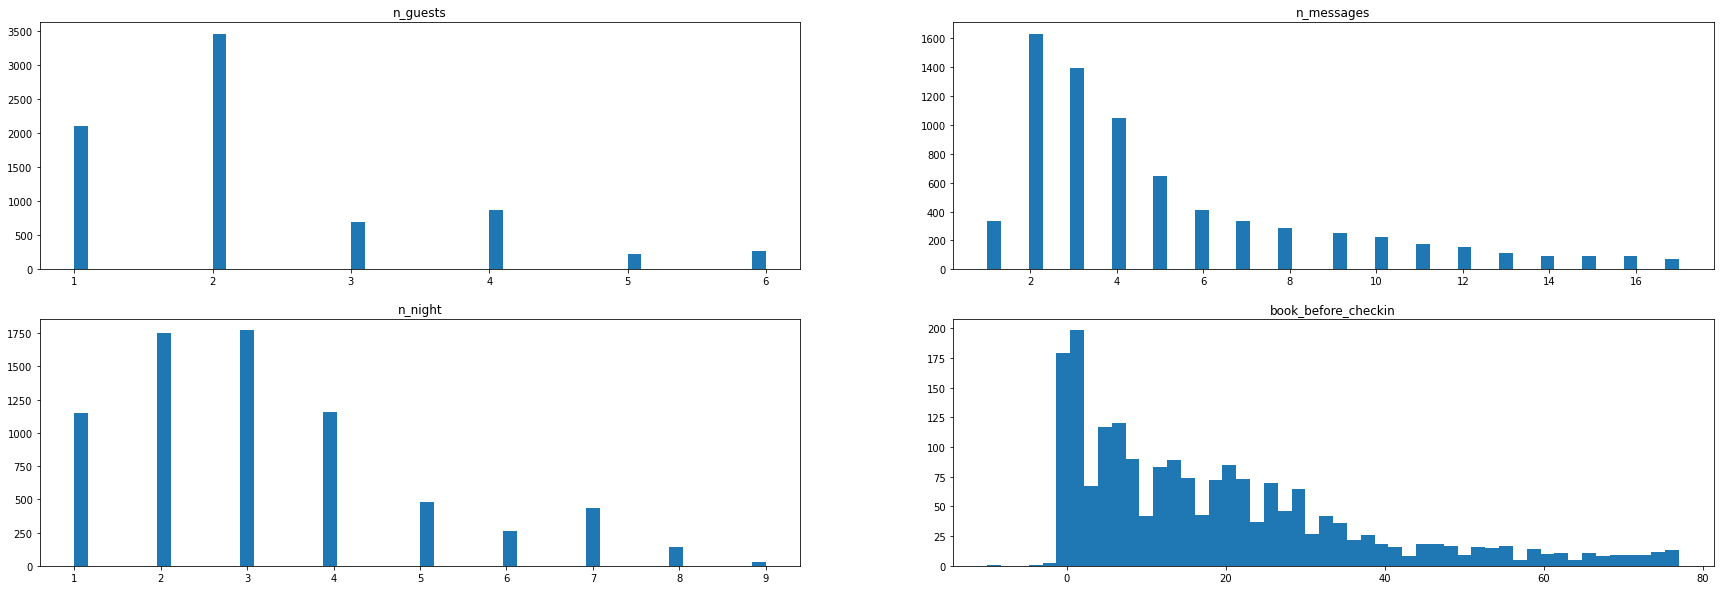

In [636]:
# Distribution of numeric feature
fig, axis = plt.subplots(2, 2)

i = 0
for row in axis:
    for col in row:
        feature_name = contacts_rem_outlier.select_dtypes('number').columns[i]
        col.hist(contacts_rem_outlier[feature_name], bins=50)
        col.set_title(feature_name)
        i += 1

fig.set_size_inches(30, 10)
plt.show()

In [637]:
# Date description
contacts_rem_outlier.describe()

,n_guests,n_messages,n_night,book_before_checkin
count,7647.000000,7347.000000,7173.000000,1975.000000
mean,2.275010,5.088744,3.205632,19.070886
std,1.260201,3.680253,1.793342,18.315595
min,1.000000,1.000000,1.000000,-10.000000
25%,1.000000,2.000000,2.000000,4.000000
50%,2.000000,4.000000,3.000000,14.000000
75%,3.000000,7.000000,4.000000,28.000000
max,6.000000,17.000000,9.000000,77.000000


The table above indicates that the inquiries usually contain 1 to 3 guests, and the messages between guests and hosts are usually less than 7. Most inquiries are less than 4 nights and usually asked 28 days before checkin. 

In [638]:
# Accepted Order
contacts['accepted'] = contacts.apply(lambda x: 'Rejected' if x['ts_accepted_at'] is pd.NaT else 'Accepted', axis=1)
contacts['checkin_month'] = contacts['ds_checkin'].dt.month
contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,n_night,book_before_checkin,accepted,checkin_month
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,13,2,8.0,Accepted,10
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,10,3,22.0,Accepted,11
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,3,2,NaN,Rejected,10
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,2,2,NaN,Rejected,10
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26,2014-10-10 15:24:26,2014-10-10 15:24:26,2014-10-10 15:52:42,2014-10-17,2014-10-19,2,14,2,6.0,Accepted,10


In [639]:
# Acceptance rate by month
month_accept = contacts.groupby(['checkin_month', 'accepted'])['id_listing'].count().to_frame('count').reset_index()
month_accept_pt = pd.pivot_table(month_accept, values='count', index='checkin_month', columns='accepted')
month_accept_pt['accepted_rate'] = month_accept_pt['Accepted']/(month_accept_pt['Accepted']+month_accept_pt['Rejected'])
month_accept_pt

accepted,Accepted,Rejected,accepted_rate
checkin_month,,,
1,73,74,0.496599
2,46,52,0.469388
3,126,277,0.312655
4,26,10,0.722222
5,30,29,0.508475
6,18,24,0.428571
7,17,30,0.361702
8,11,25,0.305556
9,2,6,0.250000


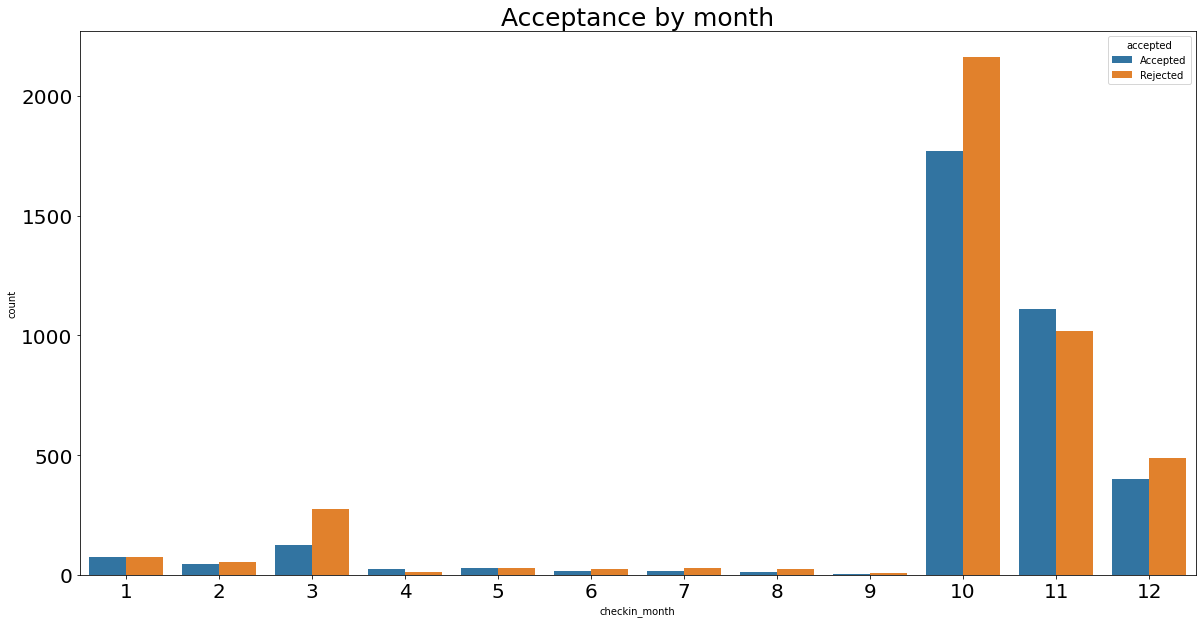

In [640]:
# Plot accepted by month
plt.figure(figsize=(20,10))

sns.barplot(x='checkin_month', y='count', hue='accepted', data=month_accept)
plt.title('Acceptance by month', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Apr has the highest acceptance rate, but the number of inquiries with checkin time from Jan to Sep is very low which could render the acceptance rate uninformative. The acceptance rates from Oct to Dec are relatively close, but acceptance rate in Nov is higher than 50%. 

In [641]:
# Acceptance rate by month
n_guest_accept = contacts.groupby(['n_guests', 'accepted'])['id_listing'].count().to_frame('count').reset_index()
n_guest_accept_pt = pd.pivot_table(n_guest_accept, values='count', index='n_guests', columns='accepted')
n_guest_accept_pt['accepted_rate'] = n_guest_accept_pt['Accepted']/(n_guest_accept_pt['Accepted']+n_guest_accept_pt['Rejected'])
n_guest_accept_pt

accepted,Accepted,Rejected,accepted_rate
n_guests,,,
1,965.0,1149.0,0.456481
2,1618.0,1844.0,0.467360
3,338.0,362.0,0.482857
4,377.0,493.0,0.433333
5,125.0,102.0,0.550661
6,140.0,134.0,0.510949
7,24.0,38.0,0.387097
8,23.0,32.0,0.418182
9,1.0,2.0,0.333333


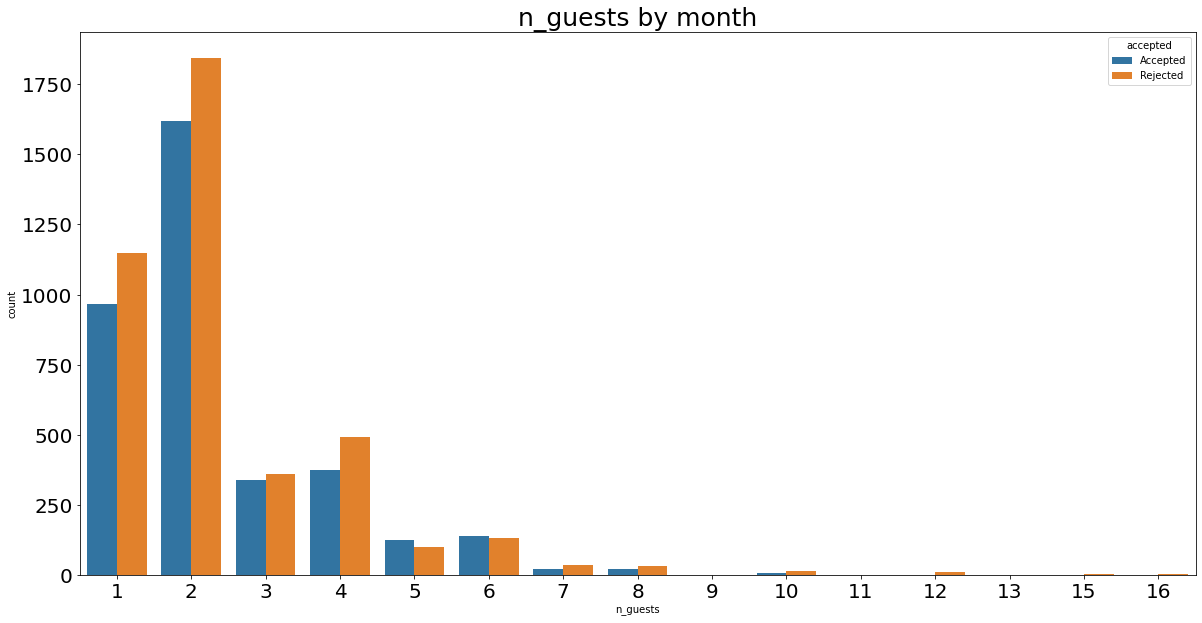

In [642]:
# Plot accepted by n_guests
plt.figure(figsize=(20,10))

sns.barplot(x='n_guests', y='count', hue='accepted', data=n_guest_accept)
plt.title('n_guests by month', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Most inquiries ask about rooms for 1 or 2 guests, and acceptance rate for those are not too high. Only inquiries asking about 5 and 6 guests have the acceptance rate over 50%.

In [643]:
# Merge the contacts and searches datasets
merge_data = pd.merge(contacts, searches, left_on='id_guest', right_on='id_user', how='inner')
merge_data.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin_x,ds_checkout_x,n_guests,...,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,search_before_checkin,Checkin_Month,Checkin_weekday_name
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,...,2.0,2,2,CA,0.0,130.0,",Entire home/apt",9.0,10,Monday
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,...,3.0,1,1,DK,0.0,336.0,",Entire home/apt,Private room,Private room",44.0,11,Thursday
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,...,2.0,2,2,CY,0.0,1258.0,",Entire home/apt,Entire home/apt,Private room,...",8.0,10,Friday
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,...,2.0,2,2,CY,0.0,214.0,",Entire home/apt",7.0,10,Friday
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,...,2.0,2,2,CY,0.0,1258.0,",Entire home/apt,Entire home/apt,Private room,...",8.0,10,Friday


In [644]:
# Accepetance rate by country
country_accept = merge_data.groupby(['origin_country', 'accepted'])['id_listing'].count().to_frame('count').reset_index()
country_accept_pt = pd.pivot_table(country_accept, values='count', index='origin_country', columns='accepted')
country_accept_pt['total_inquiries'] = country_accept_pt['Accepted']+country_accept_pt['Rejected']
country_accept_pt['accepted_rate'] = country_accept_pt['Accepted']/country_accept_pt['total_inquiries']

# Filter the countries with total inquiries less than 100
country_accept_pt = country_accept_pt[country_accept_pt['total_inquiries'] >= 100].dropna().sort_values('accepted_rate', ascending=False)

In [645]:
# top 10 countries
country_accept_pt.head(5)

accepted,Accepted,Rejected,total_inquiries,accepted_rate
origin_country,,,,
DK,75.0,32.0,107.0,0.700935
PT,84.0,79.0,163.0,0.515337
SG,88.0,89.0,177.0,0.497175
CH,198.0,201.0,399.0,0.496241
DE,584.0,622.0,1206.0,0.484245


In [646]:
#  tail 10 countries
country_accept_pt.tail(5)

accepted,Accepted,Rejected,total_inquiries,accepted_rate
origin_country,,,,
IT,918.0,1583.0,2501.0,0.367053
AT,67.0,118.0,185.0,0.362162
RU,57.0,107.0,164.0,0.347561
HR,134.0,313.0,447.0,0.299776
IN,122.0,651.0,773.0,0.157827


Based on the tables above, the top 5 countries with highest acceptance rate are DK(Denmark), PT(Portugal), SG(Singapore), CH(Switzerland), DE(Germany). The top 5 countries with lowest acceptance rate are IT(Italy), AT(Austria), RU(Russia), HR(Croatia), IN(India). Especially, the inquiries from IN(India) has a very low accepted rate, and that from DK(Denmark) is much higher than other countries. 

In [647]:
# Accepeted rate by room types
home_apt = merge_data[merge_data['filter_room_types'].str.contains('Entire home/apt', na=False)]
pri_room = merge_data[merge_data['filter_room_types'].str.contains('Private room', na=False)]
shared_room = merge_data[merge_data['filter_room_types'].str.contains('Shared room', na=False)]

In [648]:
# Table of accepeted rate by room types
ac_rt = {'room_type':['Entire home/apt', 'Private room', 'Shared room'], 'acceptence_rate':
    [len(home_apt[home_apt['accepted'] == 'Accepted']) / (len(home_apt[home_apt['accepted'] == 'Accepted']) + len(home_apt[home_apt['accepted'] == 'Rejected'])), 
    len(pri_room[pri_room['accepted'] == 'Accepted']) / (len(pri_room[pri_room['accepted'] == 'Accepted']) + len(pri_room[pri_room['accepted'] == 'Rejected'])),
    len(shared_room[shared_room['accepted'] == 'Accepted']) / (len(shared_room[shared_room['accepted'] == 'Accepted']) + len(shared_room[shared_room['accepted'] == 'Rejected']))]}

ac_room_type = pd.DataFrame(data = ac_rt)                                               
ac_room_type

,room_type,acceptence_rate
0,Entire home/apt,0.420116
1,Private room,0.420219
2,Shared room,0.349945


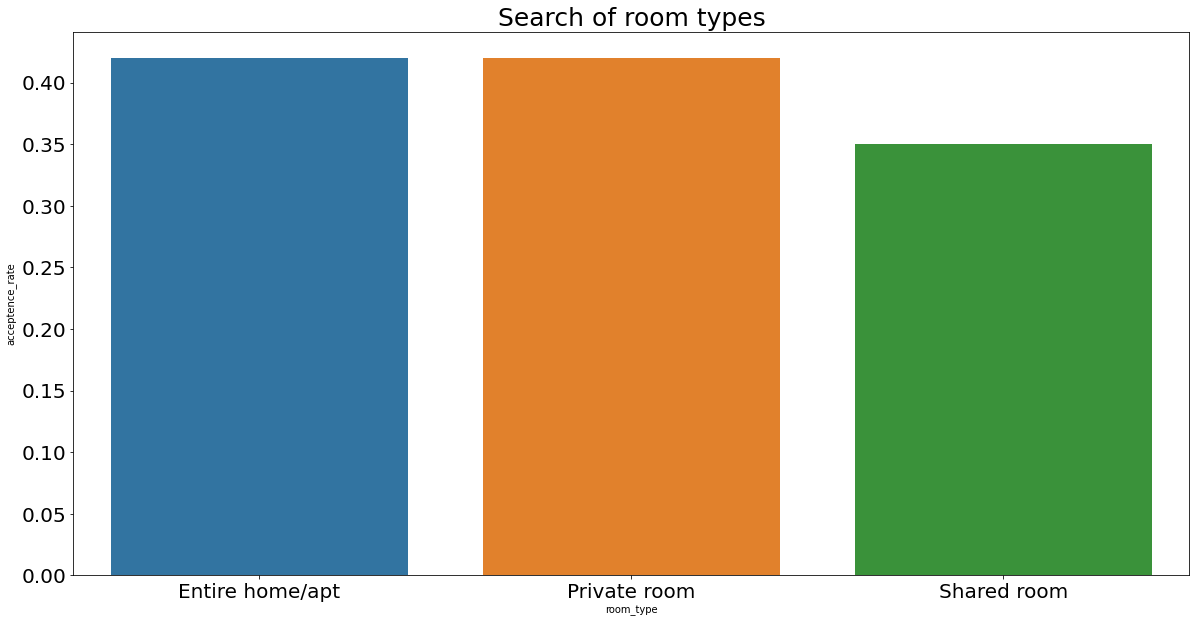

In [649]:
# Bar plot of accepeted rate by room types
plt.figure(figsize=(20,10))
sns.barplot(data=ac_room_type, x='room_type',y='acceptence_rate')
plt.title('Search of room types', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The acceptance rate of Entire home/apt and Private room are almost same, but acceptance rate of Shared room is lower than other room types.

In [650]:
# Categorize filter price max
def price(df):
    if (df['filter_price_max'] >= 0) & (df['filter_price_max'] < 100):
        return '0~100'
    elif (df['filter_price_max'] >= 100) & (df['filter_price_max'] < 200):
        return '100~200'
    elif (df['filter_price_max'] >= 200) & (df['filter_price_max'] < 300):
        return '200~300'
    elif (df['filter_price_max'] >= 300) & (df['filter_price_max'] < 400):
        return '300~400'
    else:
        return '400+'
    
merge_data['max_filter_price_range'] = merge_data.apply(lambda row: price(row), axis=1)

In [651]:
# Accepeted rate by filter price max
price_accept = merge_data.groupby(['max_filter_price_range', 'accepted'])['id_listing'].count().to_frame('count').reset_index()
price_accept_pt = pd.pivot_table(price_accept, values='count', index='max_filter_price_range', columns='accepted')
price_accept_pt['total_inquiries'] = price_accept_pt['Accepted']+price_accept_pt['Rejected']
price_accept_pt['accepted_rate'] = price_accept_pt['Accepted']/price_accept_pt['total_inquiries']
price_accept_pt

accepted,Accepted,Rejected,total_inquiries,accepted_rate
max_filter_price_range,,,,
0~100,1914,2830,4744,0.403457
100~200,1635,2167,3802,0.430037
200~300,680,905,1585,0.429022
300~400,306,372,678,0.451327
400+,5075,6624,11699,0.433798


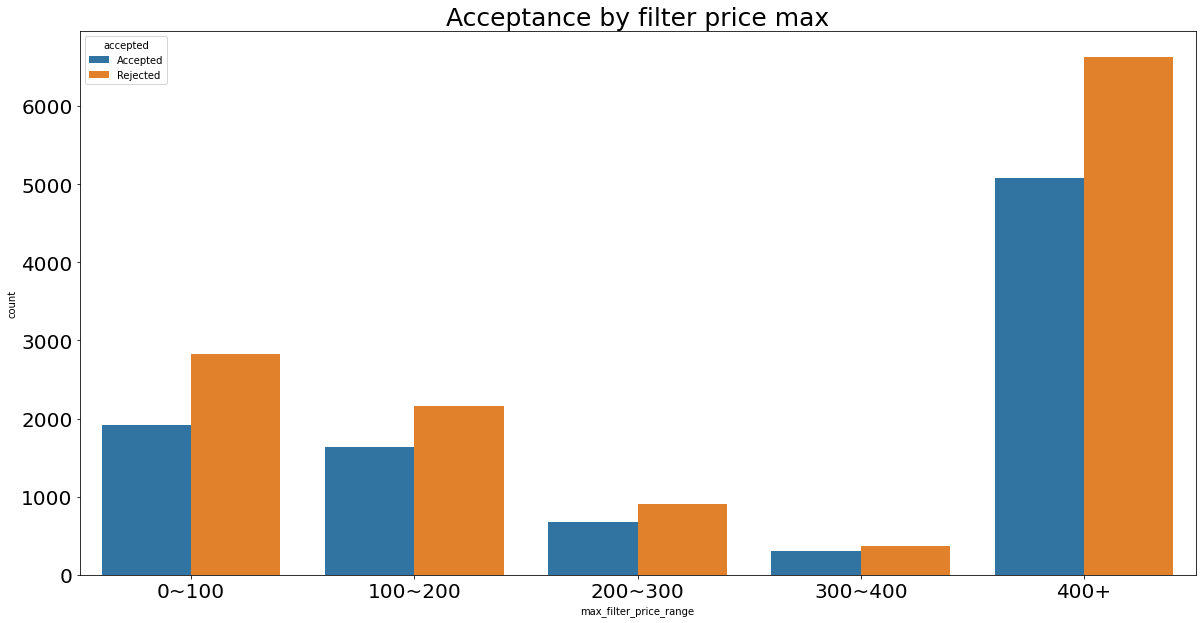

In [652]:
# Plot accepted by filter price max
plt.figure(figsize=(20,10))

sns.barplot(x='max_filter_price_range', y='count', hue='accepted', data=price_accept)
plt.title('Acceptance by filter price max', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The acceptance rate of each price segment is close, but 0~100 has lowest acceptance rate, and 300~400 has highest acceptance rate.

## Conclusion

<li>From the analysis of searches dataset, guests searching for Airbnb in Dublin are typically looking for the following:</li>

1. Duration of Stay: Most guests search for stays ranging from 2 to 4 nights.
2. Number of Guests: The majority of searches are for 1 to 2 guests.
3. Price Range: Guests often filter their searches to find room below $200.
4. Booking Lead Time: Guests typically search for Airbnb 47 days before their check-in date.
5. Popular Check-in Months: October, November, and December are the months when most guests check in, with October being particularly popular.
6. Last-Minute Searches: In October, November, and December, guests tend to have shorter time intervals between their search and check-in dates, indicating a higher level of urgency in their bookings during these months.
7. Weekend Check-ins: Most guests prefer to check in on Fridays and Saturdays.
8. Country of Origin: The top five countries with the most searches are the United Kingdom (GB), France (FR), Italy (IT), Ireland (IE), and the United States (US).
9. Trends in Check-ins of Top 5 Countries: From October to December, the number of check-ins gradually decreases. Besides, the number of check-ins from Ireland (IE) and the United States (US) is significantly higher in October compared to other months.
10. Preferred Room Type: Guests primarily search for "Entire home/apt", followed by "Private room" options, while "Shared room" listings are the least popular.

Based on these insights, guests are primarily searching for short stays (2-4 nights) with 1-2 guests, within a price range below $200. They often plan their trips around October, November, and December, with a higher urgency for bookings during this period. Weekends are the preferred check-in time, and guests from the United Kingdom, France, Italy, Ireland, and the United States show the most interest. Most guests prefer to book an entire home or apartment, followed by private rooms, while shared rooms are less popular.

<li>Based on the analysis provided, hosts tend to accept inquiries that align with the following characteristics:</li>

1. Group Size: Hosts are more likely to accept inquiries for 5 or 6 guests, as these inquiries have an acceptance rate over 50%. Inquiries for 1 or 2 guests have a lower acceptance rate, indicating that hosts may be more selective in accepting smaller group bookings.

2. Timing: From October to December, the acceptance rates are comparable, but November has a higher acceptance rate, indicating that hosts are more likely to accept inquiries for bookings in that specific month. Besides, inquiries made approximately 28 days before the desired check-in date are more likely to be accepted. This suggests that hosts prefer inquiries with a reasonable lead time, allowing them to prepare for the arrival of guests.

3. Country of Origin: Hosts show a higher acceptance rate for inquiries from countries such as Denmark (DK), Portugal (PT), Singapore (SG), Switzerland (CH), and Germany (DE). Conversely, inquiries from countries like Italy (IT), Austria (AT), Russia (RU), Croatia (HR), and India (IN) have a lower acceptance rate. Hosts may be more inclined to accept inquiries from Denmark with higher acceptance rates, but the acceptence rate from India is very low.

4. Room Type: The acceptance rates for "Entire home/apt" and "Private room" are similar, indicating that hosts have a comparable likelihood of accepting inquiries for these accommodation types. However, inquiries for "Shared room" have a lower acceptance rate, suggesting that hosts may be less inclined to accept inquiries for shared accommodations.

5. Price Segment: While the acceptance rates for different price segments are relatively close, inquiries with a price range of 0-100 have the lowest acceptance rate, whereas inquiries with a price range of 300-400 have the highest acceptance rate. This suggests that hosts may be more likely to accept inquiries for accommodations with higher price ranges.

To summarize, hosts tend to accept inquiries for larger group sizes (5 or 6 guests), inquiries made with a reasonable lead time (approximately 28 days before check-in) especially checkin in November, inquiries from countries with higher acceptance rates (such as Denmark), inquiries for "Entire home/apt" or "Private room" room types, and inquiries with price ranges toward the higher end.

<li>The gaps are between guest demand and host supply: </li>

1. Number of guests: Hosts tend to be more accepting of inquiries for larger groups (5 or 6 guests), and acceptance rates for inquiries with 1 or 2 guests are lower. However, the guests are more likely to demand the Airbnb room for 1 or 2 persons. The city manager could target marketing efforts towards group travelers, such as families or friends traveling together in order to relieve the supply pressure in small rooms.

2. High season of travel: The analysis indicates that October, November, and December are the most popular months for check-ins in Dublin. To increase bookings during off-peak months, the city manager could work on campaigns or incentives to attract guests during other times of the year. Promoting special events, festivals, or discounted rates for specific periods could help drive demand during less busy periods.

3. Targeting countries:  Inquiries from countries like Denmark (DK), Portugal (PT), Singapore (SG), Switzerland (CH), and Germany (DE) have higher acceptance rates. The city manager could collaborate with tourism boards, travel agencies, and influencers in these countries to increase awareness of Dublin as a desirable destination. At the same time, the city manager should collect more data and information to investigest the reasons lead low inquiries acceptence rate from some countries, such as Italy (IT), Austria (AT), Russia (RU), Croatia (HR), and India (IN).

4. Room types options: Since "Entire home/apt" and "Private room" options are more popular among guests, "Shared room" listings have a lower acceptance rate. The city manager could provide with some benefits for hosts in order to attract hosts to allow more guests share the rooms, such as hosts can get more commission or being more likely to be recommended to guests when they agree to a shared room.

5. Competitive Pricing: The analysis shows that inquiries with a price range of 0-100 have the lowest acceptance rate, while inquiries with a price range of 300-400 have the highest acceptance rate. The city manager could collaborate with hosts to ensure their pricing aligns with market demand and offer guidance on competitive pricing strategies. This could involve analyzing pricing trends in the area, providing data on average rates, and promoting the value proposition of accommodations in Dublin.

<li>Other data would be useful to have to deepen the analysis and understanding:</li>

1. Booking Cancellation Rates: Understanding the cancellation rates for bookings in Dublin can provide insights into the stability of guest bookings. High cancellation rates may indicate issues such as last-minute changes in travel plans or dissatisfaction with accommodations, which could be addressed to improve the overall booking experience.

2. Guest Reviews and Ratings: Access to guest reviews and ratings of Airbnb listings in Dublin would provide valuable feedback on the quality of accommodations, host responsiveness, cleanliness, and overall guest satisfaction. Analyzing these reviews can help identify areas for improvement and highlight the strengths of highly rated listings.

3. Host Satisfaction and Retention: Gathering data on host satisfaction levels, their experiences, and factors that contribute to host retention can provide insights into the host side of the Airbnb ecosystem. Understanding host needs and challenges can help implement initiatives that support hosts, improve the quality of listings, and ultimately enhance the guest experience.

4. User Profile: Collecting demographic data on guests, such as age, nationality, and travel preferences, can assist in identifying target markets and tailoring marketing campaigns to specific audience segments. This data would offer a deeper understanding of the guest profiles, enabling the city manager to develop targeted strategies to attract and cater to different guest segments.

5. Pricing Dynamics: Detailed pricing data for Airbnb listings in Dublin, including average rates, seasonal fluctuations, and pricing trends, would enable a comprehensive analysis of the pricing dynamics in the market. This information can assist in determining optimal pricing strategies for hosts and identifying potential pricing gaps or opportunities.